In [20]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
p1 = np.array([1,1])
p2 = np.array([4,4])
np.sqrt(np.sum(np.power(p2 - p1, 2)))

4.242640687119285

In [3]:
def distance(p1,p2):
    """Finds the distance between points p1 and p2"""
    return np.sqrt(np.sum(np.power(p2 - p1, 2)))
distance(p1,p2)

4.242640687119285

In [15]:
def majority_vote(votes):
    """
    Return the most common element in votes
    """
    vote_counts = {}
    for vote in votes:
        if vote in vote_counts:
            vote_counts[vote] += 1
        else:
            vote_counts[vote] = 1

    winners = []
    max_counts = max(vote_counts.values())
    for vote, count in vote_counts.items():
        if count == max_counts:
            winners.append(vote)

    return random.choice(winners)
votes = [1,2,3,1,2,3,1,2,3,3,3,3,2,2,2]
vote_counts = majority_vote(votes)
print(vote_counts)

2


In [17]:
import scipy.stats as ss
def majority_vote_short(votes):
    """
    Return the most common element in votes
    """
    mode,count = ss.mstats.mode(votes)
    return mode
print(majority_vote_short(votes))

[2.]


In [21]:
points = np.array([[1,1],[1,2],[1,3],[2,1],[2,2],[2,3],[3,1],[3,2],[3,3]])
p = np.array([2.5,2])

[0.5, 3.5, 0.5, 3.5]

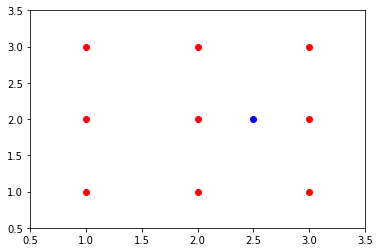

In [24]:
plt.plot(points[:,0],points[:,1], "ro")
plt.plot(p[0],p[1],"bo")

# Change the axis to make the points more visible
plt.axis([0.5,3.5,0.5,3.5])

In [34]:
def find_nearest_neighbors(p, points, k=5):
    """
    Find the k nearest neighbors of point p and return their indices
    """
    distances = np.zeros(points.shape[0])
    for i in range(len(distances)):
        distances[i] = distance(p, points[i])
    ind = np.argsort(distances)
    return ind[:k]

In [36]:
def knn_predict(p, points, outcomes, k=5):
    """
    xxx
    """
    ind = find_nearest_neighbors(p, points, k)
    return majority_vote(outcomes[ind])

In [42]:
outcomes = np.array([0,0,0,0,1,1,1,1,1])
knn_predict(np.array([1.0,2.7]), points, outcomes, k=2)

0

In [48]:
# Generating Synthetic Data
def generate_synth_data(n=50):
    """
    Create two sets of points from bivariate normal distribution.
    """
    points   = np.concatenate( (ss.norm(0,1).rvs((n,2)), ss.norm(1,1).rvs((n,2))), axis=0)
    outcomes = np.concatenate( (np.repeat(0, n), np.repeat(1, n)) )
    return (points,outcomes)

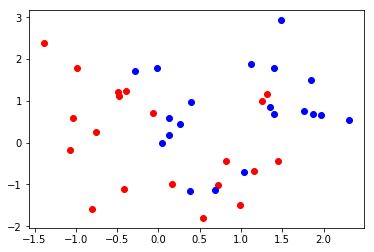

In [51]:
n = 20
points, outcomes = generate_synth_data(n)
plt.figure()
plt.plot(points[:n,0], points[:n,1], "ro")
plt.plot(points[n:,0], points[n:,1], "bo")
plt.savefig("bivardata.pdf")

In [52]:
def make_prediction_grip(oredictors, outcomes, limits, h, k):
    """
    Classify each point on the prediction grid.
    """
    x_min, x_max, y_min, y_max = limits
    xs = np.arange(x_min, x_max, h)
    ys = np.arange(y_min, y_max, h)
    xx, yy = np.meshgrid(xs, ys)
    
    prediction_grid = np.zeros(xx.shape, dtype = int)
    for i,x in enumerate(xs):
        for j,y in enumerate(ys):
            p = np.array([x,y])
            prediction_grid[j,i] = knn_predict(p, predictors, outcomes, k)
    return (xx,yy,prediction_grid)

In [1]:
def plot_prediction_grid (xx, yy, prediction_grid, filename):
    """ Plot KNN predictions for every point on the grid."""
    from matplotlib.colors import ListedColormap
    background_colormap = ListedColormap (["hotpink","lightskyblue", "yellowgreen"])
    observation_colormap = ListedColormap (["red","blue","green"])
    plt.figure(figsize =(10,10))
    plt.pcolormesh(xx, yy, prediction_grid, cmap = background_colormap, alpha = 0.5)
    plt.scatter(predictors[:,0], predictors [:,1], c = outcomes, cmap = observation_colormap, s = 50)
    plt.xlabel('Variable 1'); plt.ylabel('Variable 2')
    plt.xticks(()); plt.yticks(())
    plt.xlim (np.min(xx), np.max(xx))
    plt.ylim (np.min(yy), np.max(yy))
    plt.savefig(filename)